In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import warnings

In [3]:
df = pd.read_csv("Wine.csv")

In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [5]:
X = df.loc[:, df.columns != "Customer_Segment" ]
y = df.loc[:, df.columns == "Customer_Segment" ]

In [6]:
df.shape

(178, 14)

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc =StandardScaler()
x_norm = sc.fit_transform(X)

In [9]:
from sklearn.decomposition import PCA 

In [10]:
pca = PCA(.95)

In [11]:
pca_results = pca.fit_transform(x_norm)

In [12]:
pca_results.shape

(178, 10)

In [13]:
prindf = pd.DataFrame(data = pca_results,
                     columns = ['PCA %i' % i for i in range(1,11)])
prindf.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366


In [14]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [15]:
pca.explained_variance_ratio_.sum()

0.9616971684450643

In [16]:
pca.n_components_

10

In [17]:
ex = pca.explained_variance_ratio_
var = pd.DataFrame({"Variance %": ex * 100})
w = ['PC %i' % i for i in range(1,11)]
var.index = w
var = var.T
var

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
Variance %,36.198848,19.20749,11.123631,7.06903,6.563294,4.935823,4.238679,2.680749,2.222153,1.930019


In [18]:
var2 = pd.DataFrame({"PC": w,"Variance %":ex * 100})
var2

,PC,Variance %
0,PC 1,36.198848
1,PC 2,19.207490
2,PC 3,11.123631
3,PC 4,7.069030
4,PC 5,6.563294
5,PC 6,4.935823
6,PC 7,4.238679
7,PC 8,2.680749
8,PC 9,2.222153
9,PC 10,1.930019


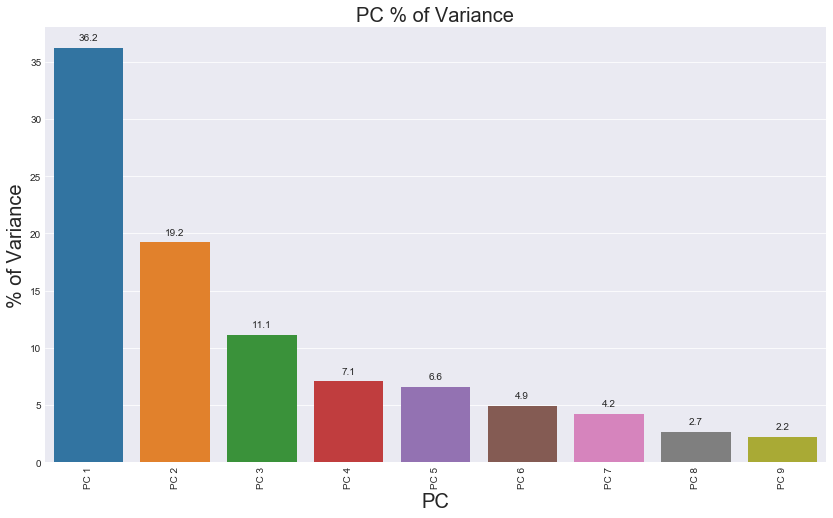

In [19]:
c = var2.iloc[0:9]
sns.set_style("darkgrid")
plt.figure(figsize = (14,8))
b = sns.barplot(x = "PC", y = "Variance %", data = c)
plt.xticks(rotation=90)
plt.ylabel("% of Variance", fontsize = 20)
plt.xlabel("PC", fontsize = 20)
plt.title("PC % of Variance",fontsize = 20)
for p in b.patches:
    b.annotate(
        s='{:.1f}'.format(p.get_height()),
        xy=(p.get_x()+p.get_width()/2.,p.get_height()),
        ha='center',va='center',
        xytext=(0,10),
        textcoords='offset points')

In [20]:
df2 = pd.DataFrame(pca.components_, columns = X.columns)
w = ['PC %i' % i for i in range(1,11)]
df2.index = w
df2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC 1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC 2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC 3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC 4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC 5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869


In [21]:
df2.T

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
Alcohol,0.144329,-0.483652,-0.207383,-0.017856,-0.265664,-0.213539,-0.056396,-0.396139,0.508619,0.211605
Malic_Acid,-0.245188,-0.224931,0.089013,0.536890,0.035214,-0.536814,0.420524,-0.065827,-0.075283,-0.309080
Ash,-0.002051,-0.316069,0.626224,-0.214176,-0.143025,-0.154475,-0.149171,0.170260,-0.307694,-0.027125
Ash_Alcanity,-0.239320,0.010591,0.612080,0.060859,0.066103,0.100825,-0.286969,-0.427970,0.200449,0.052799
Magnesium,0.141992,-0.299634,0.130757,-0.351797,0.727049,-0.038144,0.322883,0.156361,0.271403,0.067870
Total_Phenols,0.394661,-0.065040,0.146179,0.198068,-0.149318,0.084122,-0.027925,0.405934,0.286035,-0.320131
Flavanoids,0.422934,0.003360,0.150682,0.152295,-0.109026,0.018920,-0.060685,0.187245,0.049578,-0.163151
Nonflavanoid_Phenols,-0.298533,-0.028779,0.170368,-0.203301,-0.500703,0.258594,0.595447,0.233285,0.195501,0.215535
Proanthocyanins,0.313429,-0.039302,0.149454,0.399057,0.136860,0.533795,0.372139,-0.368227,-0.209145,0.134184
Color_Intensity,-0.088617,-0.529996,-0.137306,0.065926,-0.076437,0.418644,-0.227712,0.033797,0.056218,-0.290775


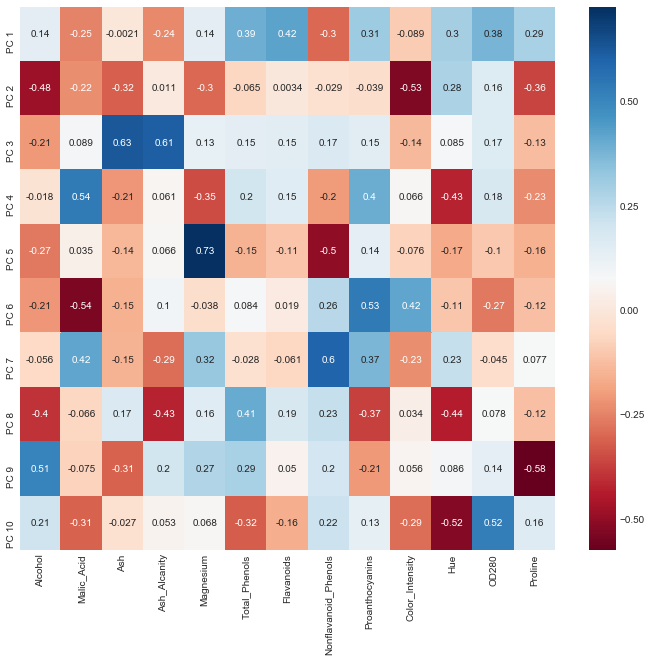

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
sns.heatmap(df2, ax =ax , cmap = "RdBu", annot=True)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: T

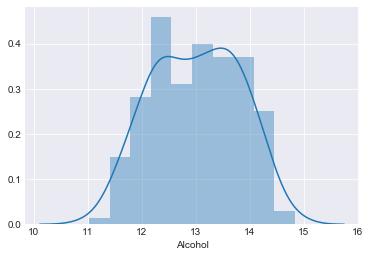

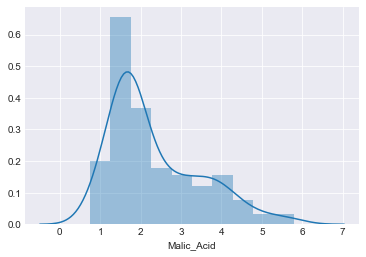

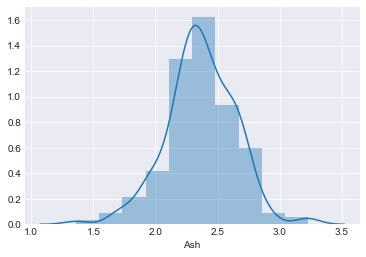

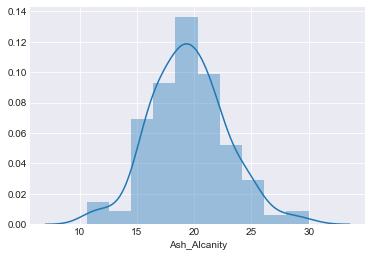

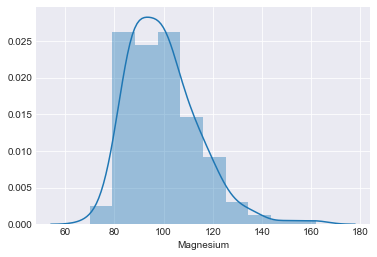

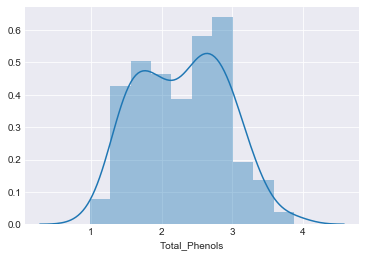

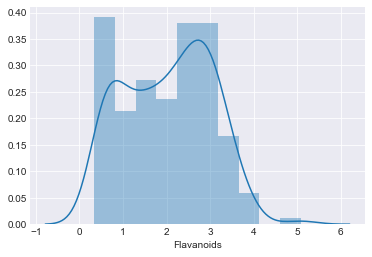

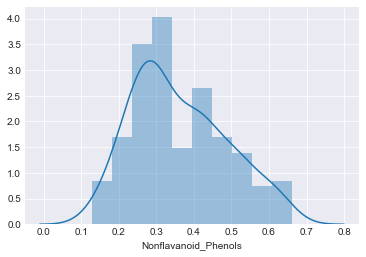

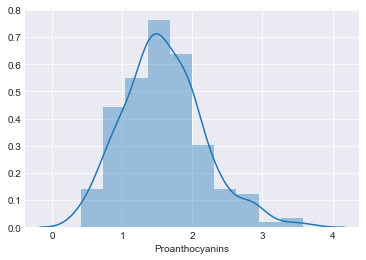

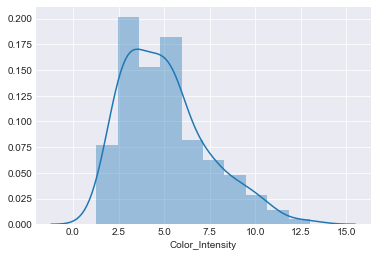

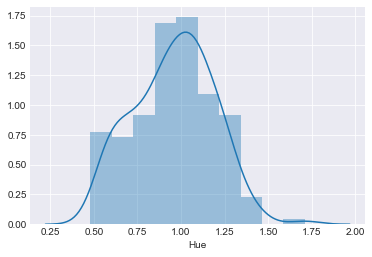

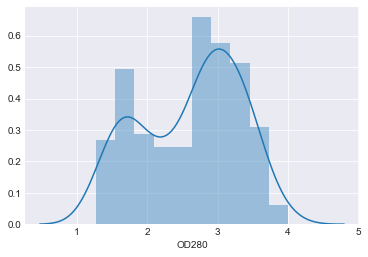

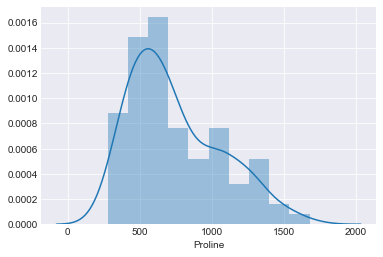

In [23]:
for i, col in enumerate(X.columns):
    plt.figure(i)
    sns.distplot(X[col],bins=10)


In [24]:
sum_df = np.sum(np.abs(df2))
sum_df = pd.DataFrame(sum_df, columns= ["comp_sum"])
sum_df.reset_index()

,index,comp_sum
0,Alcohol,2.505182
1,Malic_Acid,2.538763
2,Ash,2.110270
3,Ash_Alcanity,2.057966
4,Magnesium,2.507890
5,Total_Phenols,2.077413
6,Flavanoids,1.317876
7,Nonflavanoid_Phenols,2.700047
8,Proanthocyanins,2.655592
9,Color_Intensity,1.925427


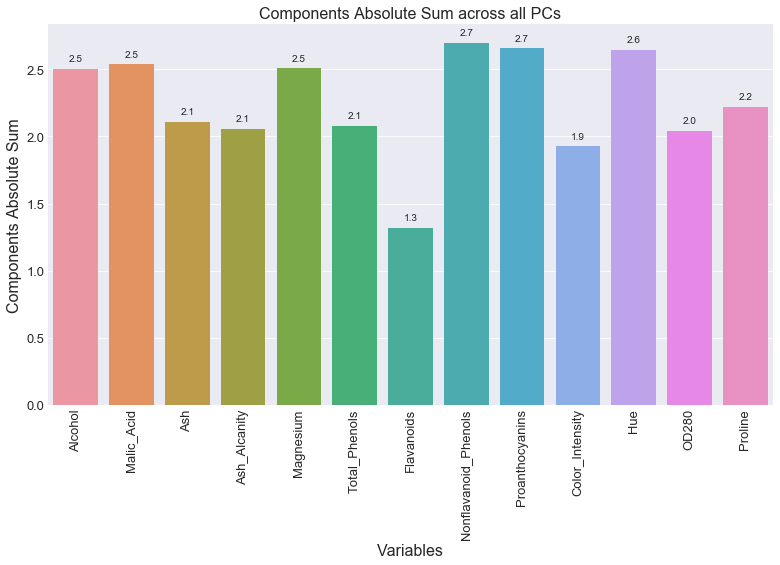

In [25]:
plt.figure(figsize = (13,7))
b = sns.barplot(x = sum_df.index, y = "comp_sum", data = sum_df)
plt.xticks(rotation = 90, fontsize = 13)
plt.yticks( fontsize = 13)
plt.title("Components Absolute Sum across all PCs", fontsize = 16)
plt.xlabel("Variables", fontsize = 16)
plt.ylabel("Components Absolute Sum",fontsize = 16)
for p in b.patches:
        b.annotate(
            s='{:.1f}'.format(p.get_height()),
            xy=(p.get_x()+p.get_width()/2.,p.get_height()),
            ha='center',va='center',
            xytext=(0,10),
            textcoords='offset points')